# Linear Regression in plain Python

## 1. What is linear regression

* Linear: graph **is** a straight line
* Non-linear: graph **is not** a straight line
* regression: when we try to measure or predict something, the value we get is estimator, which means it's not the real value, we measure tons of times to get as close to the real value as possible, and use these estimated values to **regress** to real value, this is why we call it regression. 

## 2. What regression can be used for

We can process a great amout of observed data and try to come up with a formula, which means we want to find out the relatinship among the data, hence we can simulate the results.

E.g. House pricing prediction, Credit predciton.

## 3. General form of formula

![](https://github.com/zotroneneis/machine_learning_basics/raw/a3a4c68c81b8f71c792340de5d4ab67ae333afa1//figures/linear_regression.jpg)

$$Y = \omega X + b$$

where $\omega$ is the coefficient, b is the bias.

## 4. How to calculate (with Loss Function)

$$J=\frac{1}{2 m} \sum_{m}^{i=1}\left(y^{\prime}-y\right)^{2}$$

We can use **gradient descent method** to find the minimul value (minimum square error), which means we minimize the error, and get optimal $\omega$ and $b$.

## 5. Tickle with overfitting and underfitting using regularization

We add a parameter in the loss function to regularization it , so we can:
* control parameter, and limit the output of our model in a certain range
* limit parameter searching space
* deal with overfitting and underfitting


### 5.2 L2 Regularization

$$J_0=\frac{1}{2 m} \sum_{m}^{i=1}\left(y^{\prime}-y\right)^{2}$$

$$J=J_{0}+\lambda \sum_{w} w^{2}$$

$J_0$ is the function in 4

When to use L2 Regularization: Our model is a **linear** model, and number of input features's dimensions is small.

### 5.3 L1 Regularization (Lasso Regularization)

$$J_0=\frac{1}{2 m} \sum_{m}^{i=1}\left(y^{\prime}-y\right)^{2}$$

$$J=J_{0}+\lambda\left(\left|w_{1}\right|+\left|w_{2}\right|\right)$$

### 5.4 ElasticNet Regression

$$\min \left(\frac{1}{2 m}\left[\sum_{i=1}^{m}\left(y_{i}{ }^{\prime}-y_{i}\right)^{2}+\lambda \sum_{j=1}^{n} \theta_{j}^{2}\right]+\lambda \sum_{j=1}^{n}|\theta|\right)$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(801)

## Create Dataset 

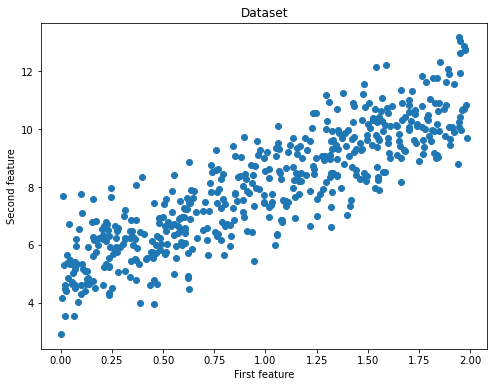

In [6]:

X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [7]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


## Linear regression class

In [8]:
class LinearRegression:
    
    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Training with gradient descent

Cost at iteration 0: 67.99991665102361
Cost at iteration 100: 2.1366350933128633
Cost at iteration 200: 1.2305354180837023
Cost at iteration 300: 1.1479544106692658
Cost at iteration 400: 1.0945799691324822
Cost at iteration 500: 1.0555571606795968


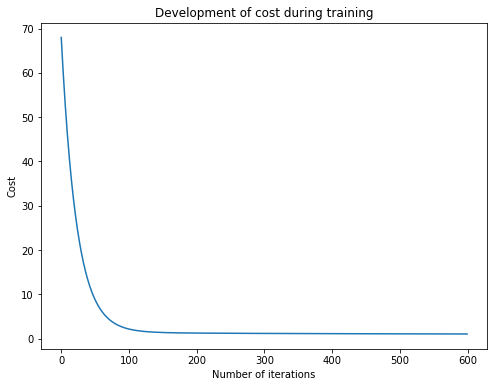

In [9]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Testing (gradient descent model)

In [10]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 1.027
Error on test set: 1.0


## Visualize test predictions

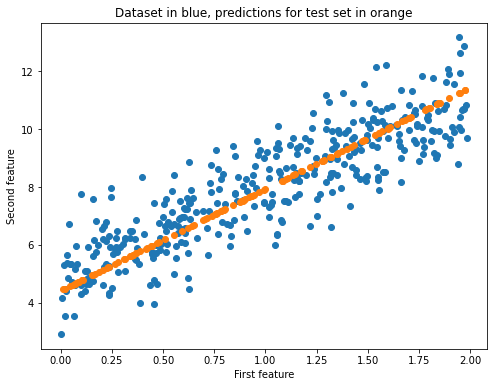

In [11]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()